In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Setting up 

In [32]:
royal_blue = '#00538C'
navy_blue = '#002B5E'
silver = '#B8C4CA'
black = '#000000'
white = '#FFFFFF'

In [4]:
plt.style.use('seaborn')

## Scoring distribution based on type of play

### Final results

In [5]:
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats

In [6]:
def get_data_tracking_touches():
    # get data frame
    touches_types = LeagueDashPtStats(pt_measure_type='Efficiency', player_or_team='Player')
    touches_df = touches_types.get_data_frames()[0]
    
    # get doncic data only and add column
    doncic_df = touches_df.loc[touches_df.PLAYER_NAME=='Luka Doncic']
    doncic_df.loc[:, 'UNCLASSIFIED_PTS'] = doncic_df.POINTS - doncic_df.DRIVE_PTS - doncic_df.CATCH_SHOOT_PTS - \
        doncic_df.PULL_UP_PTS - doncic_df.PAINT_TOUCH_PTS - doncic_df.POST_TOUCH_PTS - doncic_df.ELBOW_TOUCH_PTS
    
    # pick interesting columns
    interesting_attrs = [
        doncic_df.DRIVE_PTS,
        doncic_df.CATCH_SHOOT_PTS,
        doncic_df.PULL_UP_PTS,
        doncic_df.PAINT_TOUCH_PTS,
        doncic_df.POST_TOUCH_PTS,
        doncic_df.ELBOW_TOUCH_PTS,
        doncic_df.UNCLASSIFIED_PTS
    ]
    
    return interesting_attrs

In [7]:
def plot_tracking_touches(data, ax):
    x_labels = [item.name.replace('_', ' ') for item in interesting_attrs]

    ax.bar(
        x=x_labels,
        height=[item.iloc[0] for item in interesting_attrs],
        color=royal_blue
    )

    for i in range(len(interesting_attrs)):
        points = interesting_attrs[i].iloc[0]
        ax.text(x=i, y=points-10, s=points, ha='center', color=silver, size=18)

    ax.set_title("Luka Dončić scoring distribution", size=24)

    ax.grid(False)
    ax.yaxis.set_visible(False)


    ax.set_facecolor(silver)

    fig.set_facecolor(silver)
    y_labels = ax.get_yticklabels()

    ax.set_xticklabels(x_labels, rotation=45, ha='right', size=14)
    
    return ax

### Prototyping

In [8]:
touches_types = LeagueDashPtStats(pt_measure_type='Efficiency', player_or_team='Player')

In [9]:
touches_df = touches_types.get_data_frames()[0]

In [10]:
doncic_df = touches_df.loc[touches_df.PLAYER_NAME=='Luka Doncic']

In [11]:
doncic_df.loc[:, 'UNCLASSIFIED_PTS'] = doncic_df.POINTS - doncic_df.DRIVE_PTS - doncic_df.CATCH_SHOOT_PTS - \
    doncic_df.PULL_UP_PTS - doncic_df.PAINT_TOUCH_PTS - doncic_df.POST_TOUCH_PTS - doncic_df.ELBOW_TOUCH_PTS

/home/daniel/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/daniel/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
interesting_attrs = [
    doncic_df.DRIVE_PTS,
    # doncic_df.DRIVE_FG_PCT,
    doncic_df.CATCH_SHOOT_PTS,
    doncic_df.PULL_UP_PTS,
    doncic_df.PAINT_TOUCH_PTS,
    doncic_df.POST_TOUCH_PTS,
    doncic_df.ELBOW_TOUCH_PTS,
    doncic_df.UNCLASSIFIED_PTS
]

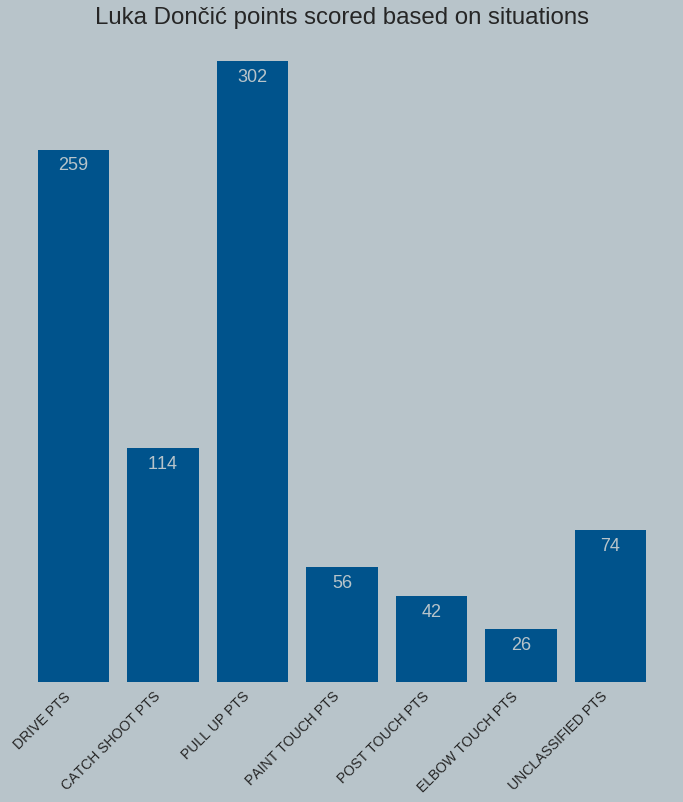

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))


x_labels = [item.name.replace('_', ' ') for item in interesting_attrs]

ax.bar(
    x=x_labels,
    height=[item.iloc[0] for item in interesting_attrs],
    color=royal_blue
)

for i in range(len(interesting_attrs)):
    points = interesting_attrs[i].iloc[0]
    ax.text(x=i, y=points-10, s=points, ha='center', color=silver, size=18)

ax.set_title("Luka Dončić points scored based on situations", size=24)

ax.grid(False)
ax.yaxis.set_visible(False)


ax.set_facecolor(silver)

fig.set_facecolor(silver)
y_labels = ax.get_yticklabels()

_ = ax.set_xticklabels(x_labels, rotation=45, ha='right', size=14)


## Clutch Time is Luka Time

In [15]:
from nba_api.stats.endpoints.leaguedashplayerclutch import LeagueDashPlayerClutch
from adjustText import adjust_text

### Prototyping

In [16]:
clutch_stats = LeagueDashPlayerClutch()

In [17]:
clutch_df = clutch_stats.get_data_frames()[0]

In [22]:
sorted_clutch = clutch_df.sort_values(by='PTS', ascending=False)

In [24]:
sorted_clutch.loc[:, 'TS_PCT'] = sorted_clutch.PTS / (2 * (sorted_clutch.FGA + 0.44 * sorted_clutch.FTA)) * 100

In [36]:
top_30_scorers = sorted_clutch.iloc[:30, :]

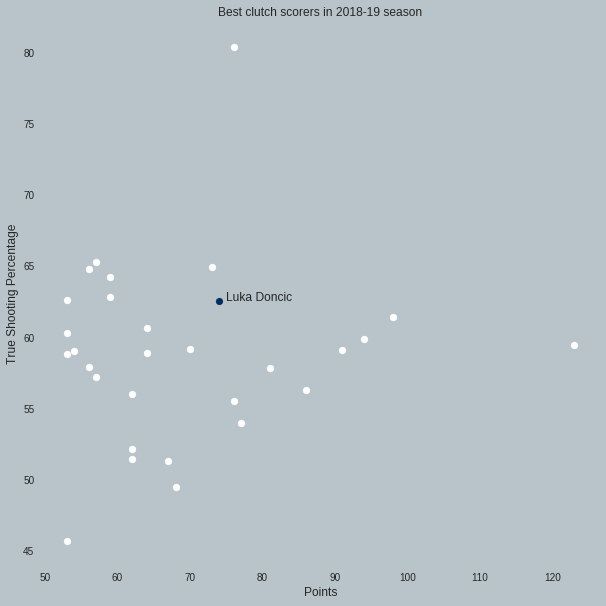

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor(silver)

doncic_row = top_30_scorers.loc[top_30_scorers.PLAYER_NAME == "Luka Doncic"]

ax.scatter(x=top_30_scorers.PTS, y=top_30_scorers.TS_PCT, c=white)
ax.scatter(x=doncic_row.PTS, y=doncic_row.TS_PCT, c=navy_blue)
ax.text(x=doncic_row.PTS.iloc[0]+1, y=doncic_row.TS_PCT.iloc[0], s=doncic_row.PLAYER_NAME.iloc[0], size=12)


ax.grid(False)
ax.set_facecolor(silver)

ax.set_ylabel('True Shooting Percentage', size=12)
ax.set_xlabel('Points', size=12)
_ = ax.set_title('Best clutch scorers in 2018-19 season')

#### Comparison with this year's rookies and historic rookies